For this project you will use `requests` package and the SODA API to access data through https://data.nashville.gov/. We'll start out with something familiar, the [Top 500 Monthly Searches](https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm), then pull in different datasets further on. You will make different API requests for each individual question.

Each dataset has its own api endpoint. You can find the endpoint for a dataset by clicking on the `API` button in the top right of the dataset screen, then copying the `API Endpoint`. The default output is `JSON`, which you can leave unchanged:

![api_endpoint](assets/api_endpoint.png)

Each API is different, so it is very important to read the documentation for each API to know how to use it properly. The documentation for the SODA API is [here](https://dev.socrata.com/consumers/getting-started.html). It is **HIGHLY RECOMMENDED** that you read the documentation before making any requests, then do deeper dives into specific use cases when questions require. NOTE that the examples in the documentation don't use the `requests` package. You will need to look at the examples and figure out which things go in the `url` and which things go in the `params`.

In [1]:
from jupyterthemes import jtplot
jtplot.style()

# Preston: https://dev.socrata.com/foundry/data.nashville.gov/fuaa-r5cm


In [2]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata

%matplotlib inline

In [4]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [5]:
response = requests.get(endpoint)

In [6]:
response

<Response [200]>

In [7]:
result = response.json()

In [8]:
search_dict = {}
for line in result:
    count = int(line.get('query_count'))
    text = line.get('query_text')
    if text in search_dict:
        search_dict[text] += count
    else:
        search_dict[text] = count

In [9]:
search_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
search_df = search_df.reset_index()
search_df.columns = ['term', 'text']
search_df.head()

,term,text
0,ebid,521
1,property maps,252
2,maps,237
3,property tax,214
4,jobs,210


In [10]:
search_df = search_df.sort_values('text', ascending=False)
search_df.head(10)

,term,text
0,ebid,521
1,property maps,252
2,maps,237
10,property taxes,235
3,property tax,214
4,jobs,210
5,employment,189
7,police,167
8,criminal court clerk,167
9,media releases,165


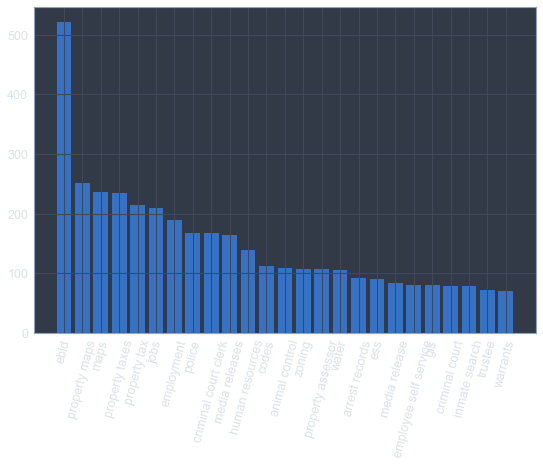

In [11]:
plt.figure(figsize=(9,6))
plt.bar('term', 'text', data = search_df.head(25))
plt.xticks(rotation = 75);

In [12]:
args = '?month=7'

In [13]:
search = endpoint + args

In [14]:
response = requests.get(search)

In [15]:
response

<Response [200]>

In [16]:
results = response.json()

In [17]:
type(results)

list

In [18]:
results[0]

{'month_name': 'July',
 'month': '7',
 'year': '2019',
 'query_count': '229',
 'query_text': 'human resources'}

In [19]:
results[0].keys()

dict_keys(['month_name', 'month', 'year', 'query_count', 'query_text'])

In [20]:
results[0]['month']

'7'

In [21]:
july_df = pd.DataFrame.from_dict(results)

In [22]:
july_df

,month_name,month,year,query_count,query_text
0,July,7,2019,229,human resources
1,July,7,2019,192,ess
2,July,7,2019,191,payroll
3,July,7,2019,161,codes
4,July,7,2019,150,jobs
...,...,...,...,...,...
995,July,7,2020,10,Fire
996,July,7,2020,10,police accident report
997,July,7,2020,10,sheriff department
998,July,7,2020,10,inspection


In [23]:
args_qt = '?query_text=ess'
# if you wanted it to have query text as ess and month as july you 
# could do:
# args_qt = '?query_text=ess&month7'

In [24]:
search_qt = endpoint + args_qt

--------------------------------------------------------------------

Question 1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

--------------------------------------------------------------------

In [55]:
fire_args = '?query_text=fire&year=2016'

In [56]:
fire_search = endpoint + fire_args

In [57]:
fire_response = requests.get(fire_search)

In [68]:
fire_response

<Response [200]>

In [69]:
fire_results = fire_response.json()

In [70]:
type(fire_results)

list

In [71]:
fire_results

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [72]:
fire_results[0]

{'month_name': 'January',
 'year': '2016',
 'query_count': '19',
 'query_text': 'fire'}

In [73]:
fire_results[0].keys()

dict_keys(['month_name', 'year', 'query_count', 'query_text'])

In [74]:
fire_2016_df = pd.DataFrame.from_dict(fire_results)

In [75]:
fire_2016_df

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


In [86]:
# search_fire_2016_df = pd.DataFrame.from_dict(fire_results)
# search_fire_2016_df = search_fire_2016_df.reset_index()
# search_fire_2016_df.columns = ['term', 'text']
# search_fire_2016_df.head(1)
fire_2016_df.sort_values(by='query_count', ascending=False).head(1)

,month_name,year,query_count,query_text
7,August,2016,47,fire


--------------------------------------------------------------------

Question 2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

--------------------------------------------------------------------

In [101]:
query_100_args='?$where=query_count > 100'

In [102]:
query_100_search= endpoint + query_100_args

In [103]:
query_100_response= requests.get(query_100_search)

In [104]:
query_100_response

<Response [200]>

In [105]:
query_100_results=query_100_response.json()

In [106]:
type(query_100_results)

list

In [107]:
query_100_results

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [108]:
query_100_results[0]

{'month_name': 'March',
 'year': '2014',
 'query_count': '101',
 'query_text': 'permits'}

In [109]:
query_100_results[0].keys()

dict_keys(['month_name', 'year', 'query_count', 'query_text'])

In [110]:
query_100_df= pd.DataFrame.from_dict(query_100_results)

In [111]:
query_100_df

,month_name,year,query_count,query_text,month
0,March,2014,101,permits,NaN
1,January,2015,101,criminal court clerk,NaN
2,September,2015,101,codes,NaN
3,March,2016,101,police,NaN
4,March,2016,101,civil service,NaN
...,...,...,...,...,...
995,July,2017,176,open data,NaN
996,May,2019,176,jobs,5
997,August,2020,176,Absentee ballot,8
998,August,2020,176,police report,8


--------------------------------------------------------------------

Question 3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  

--------------------------------------------------------------------

In [113]:
codes_100_args='?query_text=codes&$where=query_count > 100'

In [114]:
codes_100_search= endpoint + codes_100_args

In [115]:
codes_100_response=requests.get(codes_100_search)

In [116]:
codes_100_response

<Response [200]>

In [117]:
codes_100_results=codes_100_response.json()

In [118]:
type(codes_100_results)

list

In [119]:
codes_100_results

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2015',
  'query_count': '117',
  'query_text': 'codes'},
 {'month_na

In [120]:
codes_100_results[0]

{'month_name': 'September',
 'year': '2015',
 'query_count': '101',
 'query_text': 'codes'}

In [121]:
codes_100_results[0].keys()

dict_keys(['month_name', 'year', 'query_count', 'query_text'])

In [122]:
codes_100_df= pd.DataFrame.from_dict(codes_100_results)

In [123]:
codes_100_df

,month_name,year,query_count,query_text,month
0,September,2015,101,codes,NaN
1,April,2021,102,codes,4
2,August,2016,104,codes,NaN
3,November,2020,104,codes,11
4,December,2017,106,codes,NaN
5,May,2016,107,codes,NaN
6,April,2016,111,codes,NaN
7,January,2017,115,codes,NaN
8,May,2021,115,codes,5
9,August,2015,117,codes,NaN


--------------------------------------------------------------------

Question 4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

--------------------------------------------------------------------

In [ ]:
#Preston hit: you only need 1200 rows

--------------------------------------------------------------------

---Stretch Questions---

Question 5. Make an API request to pull back all the data from [hubNashville (311) Service Requests](https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh) (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one) 

--------------------------------------------------------------------

--------------------------------------------------------------------

Question 6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets. 

--------------------------------------------------------------------

--------------------------------------------------------------------

---Bonus Question---

Question 7. Socrata is used by many cities, states, and federal organizations. Find additional datasets through [Socrata's Open Data Network](http://www.opendatanetwork.com/) and do an analysis comparing them to Nashville or each other.

--------------------------------------------------------------------

--------------------------------------------------------------------

---Show and Tell---

At the end of the project you will present some general insights, visualizations, or other finding from any part of the project. This will be informal (showing your Jupyter notebook is fine, no need to make a powerpoint) and should be no more than 5 min. If you had challenges making your visualizations, then it is fine to discuss your experience working with the API and what you were intending to show.